In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import Counter
import ast

In [2]:
df = pd.read_csv('naukri_data.csv')

In [3]:
df

,job_title,company_name,experience,salary,location,job_description,role,industry_type,department,employment_type,role_category,education,key_skills,date_posted,num_openings,num_applicants,experience_bins
0,Data Analyst (0-2yrs) Bangalore,Gupta And Sharma,0 - 2 years,"₹ 3,50,000 - 6,00,000 P.A.",Bangalore/Bengaluru,Roles and Responsibilities\nAcquiring data fro...,Data Analyst,Banking,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,"B.Tech/B.E. in Computers, B.Sc in Computers, B...","['plsql', 'excel', 'data analysis', 'sas', 'or...",1 day ago,3.0,2647,0-2
1,French Data Analyst,Randstad,0 - 1 years,"₹ 2,50,000 - 3,50,000 P.A.",PAN,Roles and Responsibilities\n\nJob Description:...,Data Analyst,IT Services & Consulting,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,Any Graduate,"['Bi-lingual French', 'French Data Analyst']",1 day ago,NaN,145,0-2
2,Data Analyst,Namdhari Seeds,0 - 2 years,Not Disclosed,Bangalore/Bengaluru,Roles and Responsibilities\nCreate and validat...,Other,Agriculture / Forestry / Fishing,Other,"Full Time, Permanent",Other,MBA/PGDM in Any Specialization,"['supply chain operations', 'data analytics', ...",13 days ago,NaN,8751,0-2
3,Business Analyst/ Software Analyst/ Data Analyst,Optiontown,0 - 2 years,"₹ 4,00,000 - 7,00,000 P.A.",Delhi,"Analysts will leverage analytic, quantitative ...",Business Analyst,Aviation,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,B.Tech/B.E. in Any Specialization,"['Analysis', 'Predictive Modeling', 'Requireme...",1 day ago,NaN,1358,0-2
4,HR Data Analyst,Walmart,2 - 5 years,Not Disclosed,Bangalore/Bengaluru,Data Analyst - TA Position summary:\nDemonstra...,HR Analyst,Software Product,Human Resources,"Full Time, Temporary/Contractual",HR Operations,Any Graduate,"['Excel Report Preparation', 'excel', 'data an...",Few Hours Ago,NaN,50,2-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Data Analyst,Capital Placement Services,2 - 4 years,Not Disclosed,Delhi,Expertise in analysing data and creating innov...,Business Analyst,Recruitment / Staffing,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,B.Tech/B.E. in Production/Industrial,"['Computer science', 'Data analysis', 'Excel',...",30+ days ago,1.0,1430,2-5
963,Data Analyst,The Education Alliance,2 - 4 years,Not Disclosed,Chennai,Interested in starting or advancing an early c...,Data Analyst,NGO / Social Services / Industry Associations,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,Any Graduate,"['Root cause analysis', 'Data analysis', 'Inte...",30+ days ago,1.0,628,2-5
964,Data Analyst I,Venator Holdings,2 - 4 years,Not Disclosed,Hyderabad/Secunderabad,Key Responsibilities:\nPerform detailed data a...,Database Architect / Designer,IT Services & Consulting,Engineering - Software & QA,"Full Time, Permanent",DBA / Data warehousing,Any Graduate,"['Computer science', 'Data analysis', 'metadat...",30+ days ago,1.0,110,2-5
965,Data Analyst,TN Business Services,2 - 5 years,Not Disclosed,Gurgaon/Gurugram,- Using automated tools to extract data from p...,Data Analyst,Management Consulting,Data Science & Analytics,"Full Time, Permanent",Business Intelligence & Analytics,B.Tech/B.E. in Production/Industrial,"['Data analysis', 'Coding', 'Database design',...",30+ days ago,1.0,247,2-5


# Job Postings Grouped By Experience

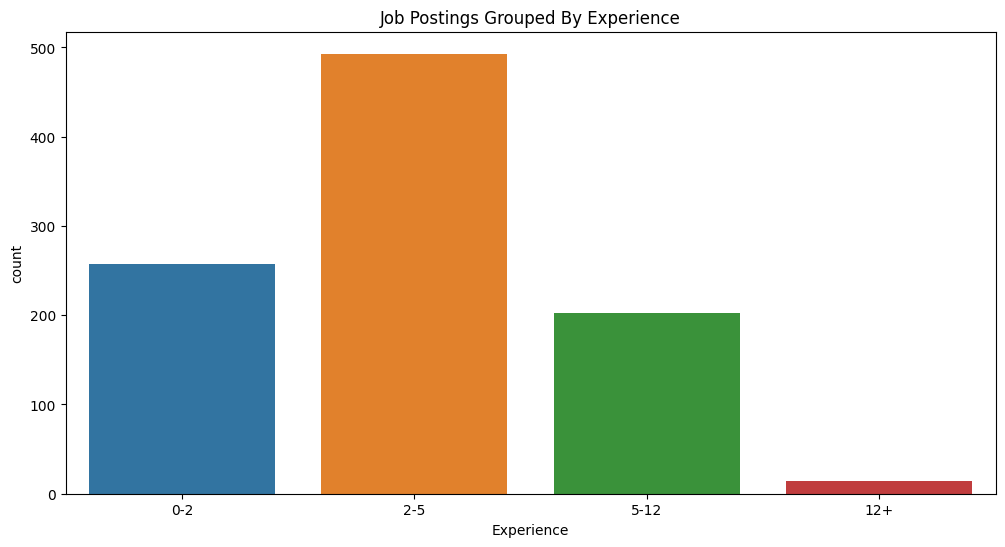

In [30]:
# experience bar graph
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='experience_bins')
plt.title("Job Postings Grouped By Experience")
plt.xlabel('Experience');

# Job Postings Grouped By Role

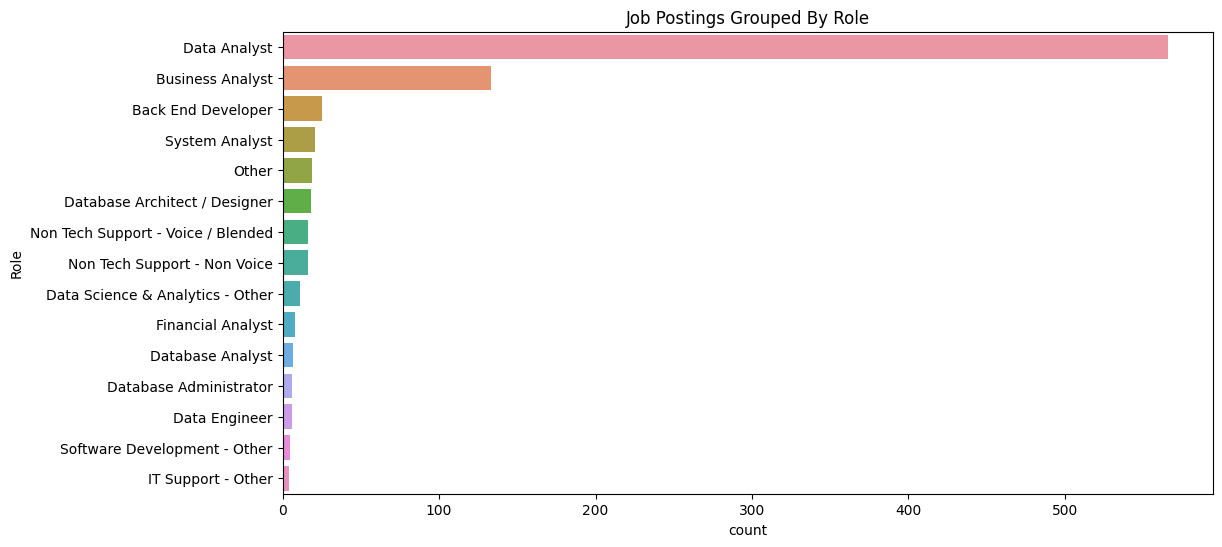

In [33]:
# role bar graph
plt.figure(figsize=(12, 6))

role_value_counts = df['role'].value_counts()

# Get the top 15 values
top_15_role = role_value_counts[:15]

sns.countplot(data=df, y='role', order=top_15_role.index, orient='h')
plt.title("Job Postings Grouped By Role")
plt.ylabel('Role');

# Top 10 Most Common Skills in Job Postings

In [6]:
# Get a list of the items in each row
skills_per_row = [ast.literal_eval(items) for items in df['key_skills']]

# Flatten the list of lists into a single list
skills = [item for sublist in skills_per_row for item in sublist]

most_common_skills = Counter(skills).most_common()

In [7]:
skills_df = pd.DataFrame(most_common_skills, columns=['Skill', 'Count'])

In [8]:
skills_df['Skill'] = skills_df['Skill'].str.upper()  

In [9]:
grp_skills_df = skills_df.groupby('Skill').sum().nlargest(50, 'Count').reset_index()

In [10]:
grp_skills_df

,Skill,Count
0,SQL,440
1,DATA ANALYSIS,380
2,DATA ANALYST,328
3,PYTHON,304
4,DATA ANALYTICS,168
5,ANALYTICAL,164
6,ANALYTICS,156
7,DATA MANAGEMENT,142
8,EXCEL,123
9,DATA MINING,113


In [34]:
# dropping the following rows, because i feel they don't add value to this particular graph in my opinion.
# I am focused on getting tools rather than concepts as skills
filtered_skills = grp_skills_df.drop(index=[1, 2, 4, 5, 6, 7, 14, 15, 16, 10, 13, 14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 31, 32, 33])

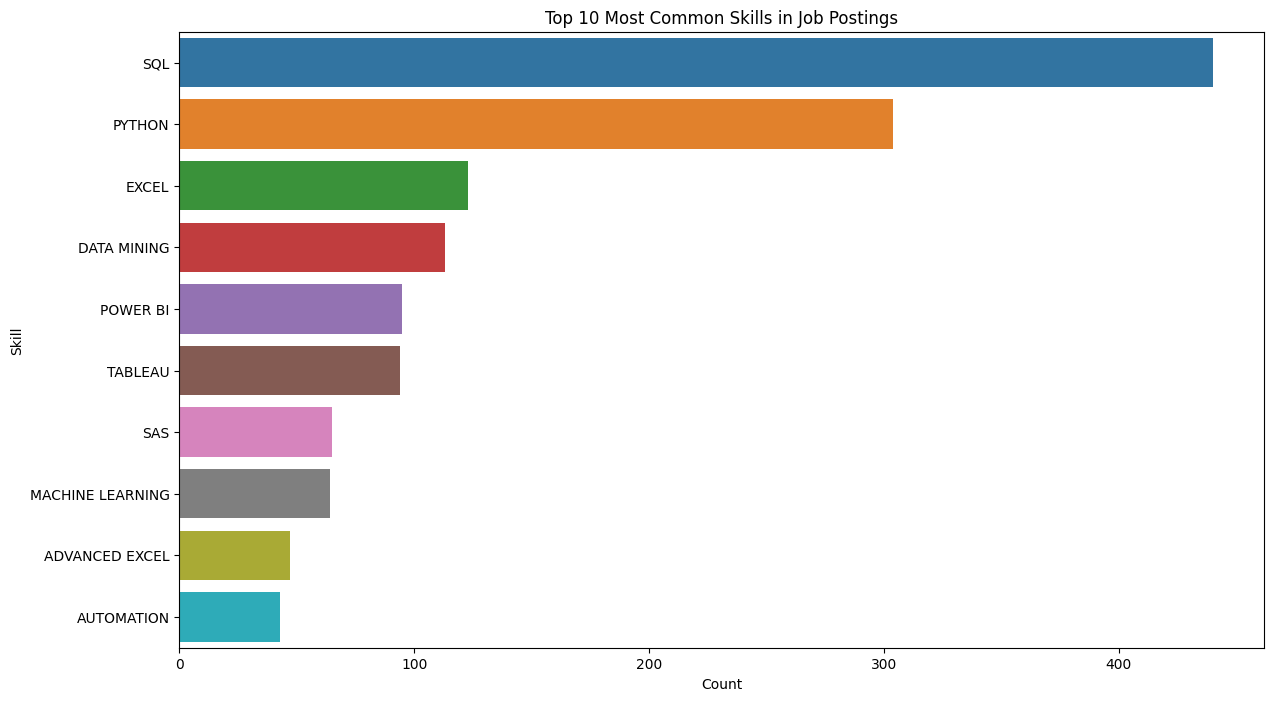

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_skills[:10], x='Count', y='Skill', orient='h')
plt.title("Top 10 Most Common Skills in Job Postings");

# Top 10 Most Common Cities in Job Postings

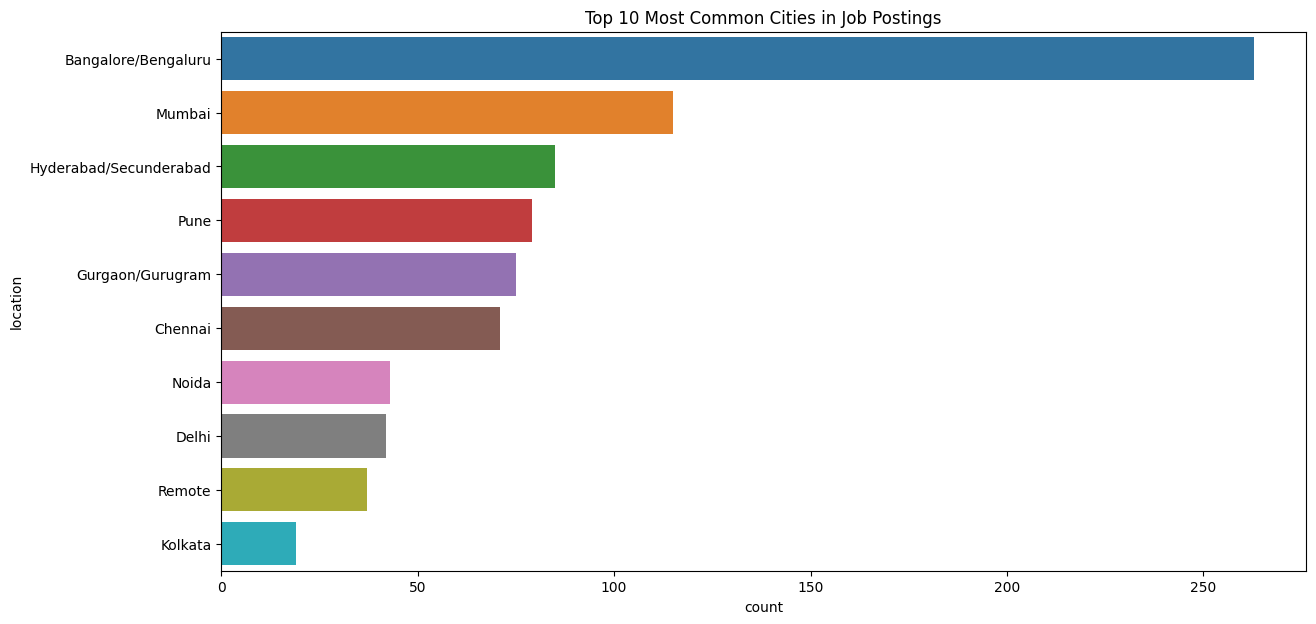

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='location', order=df['location'].value_counts().head(10).index, orient='h')
plt.title("Top 10 Most Common Cities in Job Postings");

# Top 10 Most Common Companies in Job Postings

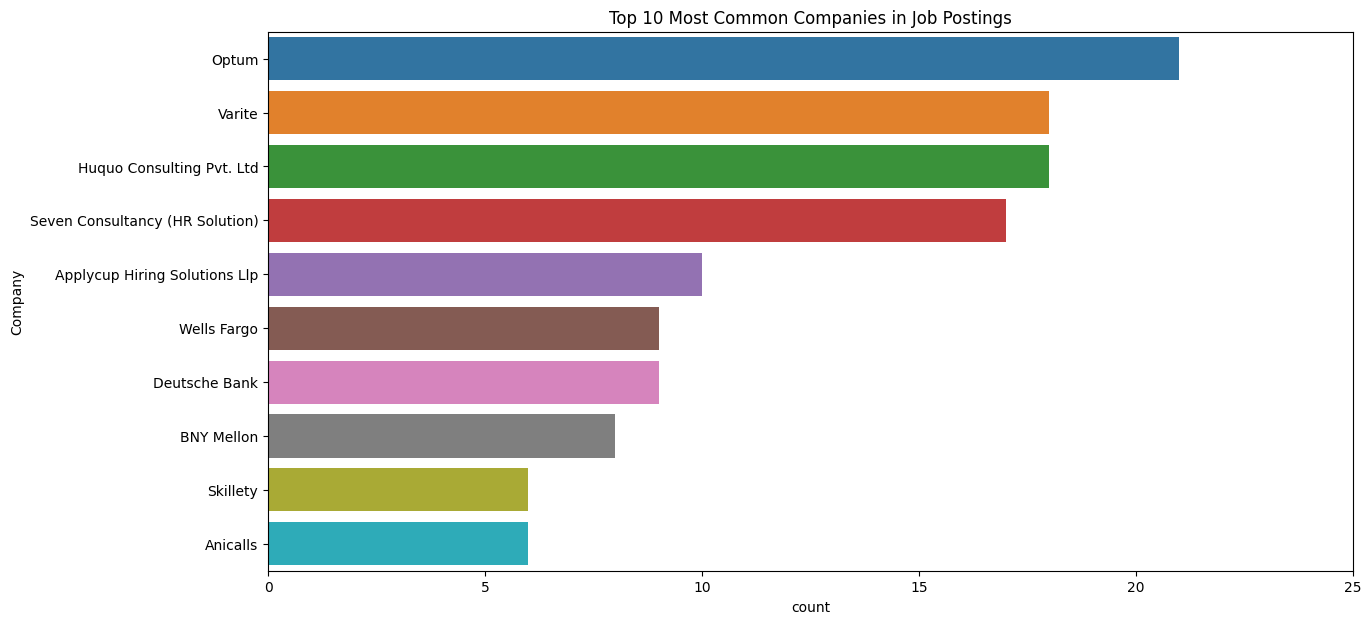

In [32]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='company_name', order=df['company_name'].value_counts().head(10).index, orient='h')
plt.title("Top 10 Most Common Companies in Job Postings")
plt.xlim(0, 25);
plt.ylabel('Company');

# Top 10 Most Common Industry Type in Job Postings

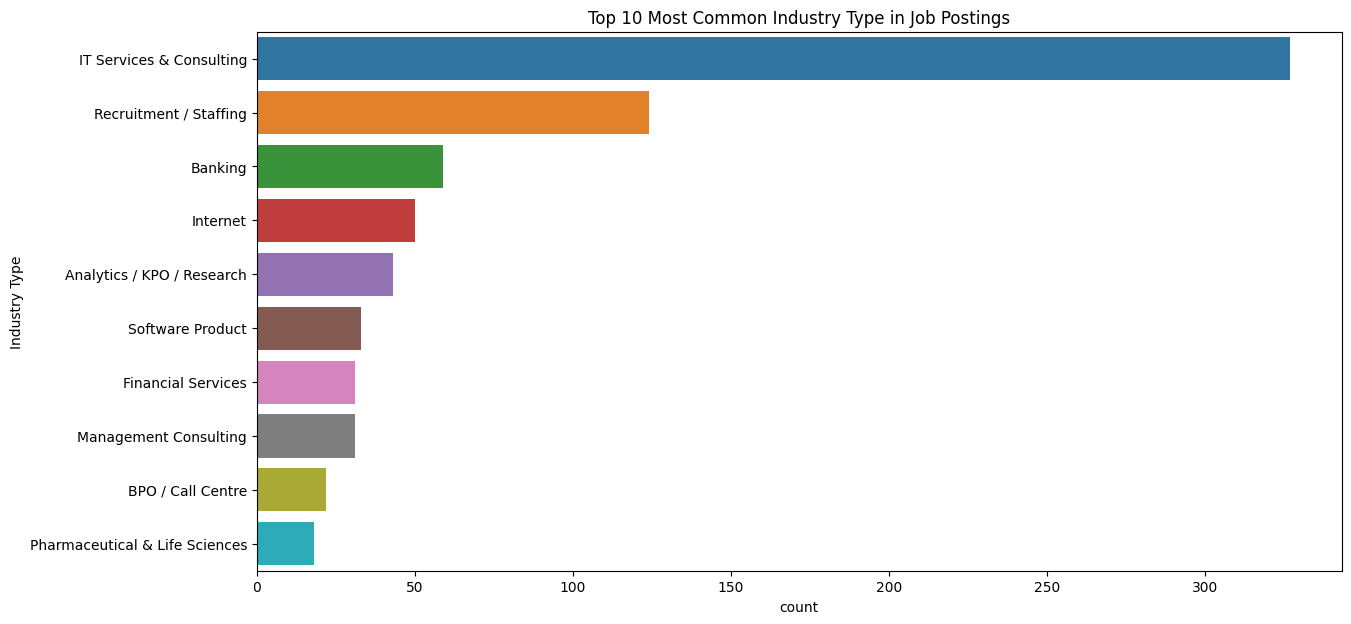

In [15]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='industry_type', order=df['industry_type'].value_counts().head(10).index, orient='h')
plt.title("Top 10 Most Common Industry Type in Job Postings")
plt.ylabel('Industry Type');

# Salary

In [16]:
df['salary'].value_counts()

Not Disclosed                     855
₹ 15,00,000 - 30,00,000 P.A.        4
₹ 3,00,000 - 5,00,000 P.A.          4
₹ 15,00,000 - 27,50,000 P.A.        3
₹ 60,00,000 - 1,00,00,000 P.A.      3
                                 ... 
₹ 2,50,000 - 3,50,000 P.A.          1
₹ 3,00,000 - 4,50,000 P.A.          1
₹ 7,00,000 - 13,00,000 P.A.         1
₹ 7,00,000 - 9,00,000 P.A.          1
₹ 2,00,000 - 7,00,000 P.A.          1
Name: salary, Length: 82, dtype: int64

In [35]:
# percentage of not disclosed. Most of the job postings did not disclose salary
round(855/df.shape[0] * 100, 2)

88.42

# Employement Type

In [18]:
# almost all of the jobs are full time, permanent
df['employment_type'].value_counts()

Full Time, Permanent                958
Full Time, Temporary/Contractual      9
Name: employment_type, dtype: int64

# Top 10 Most Common Departments in Job Postings

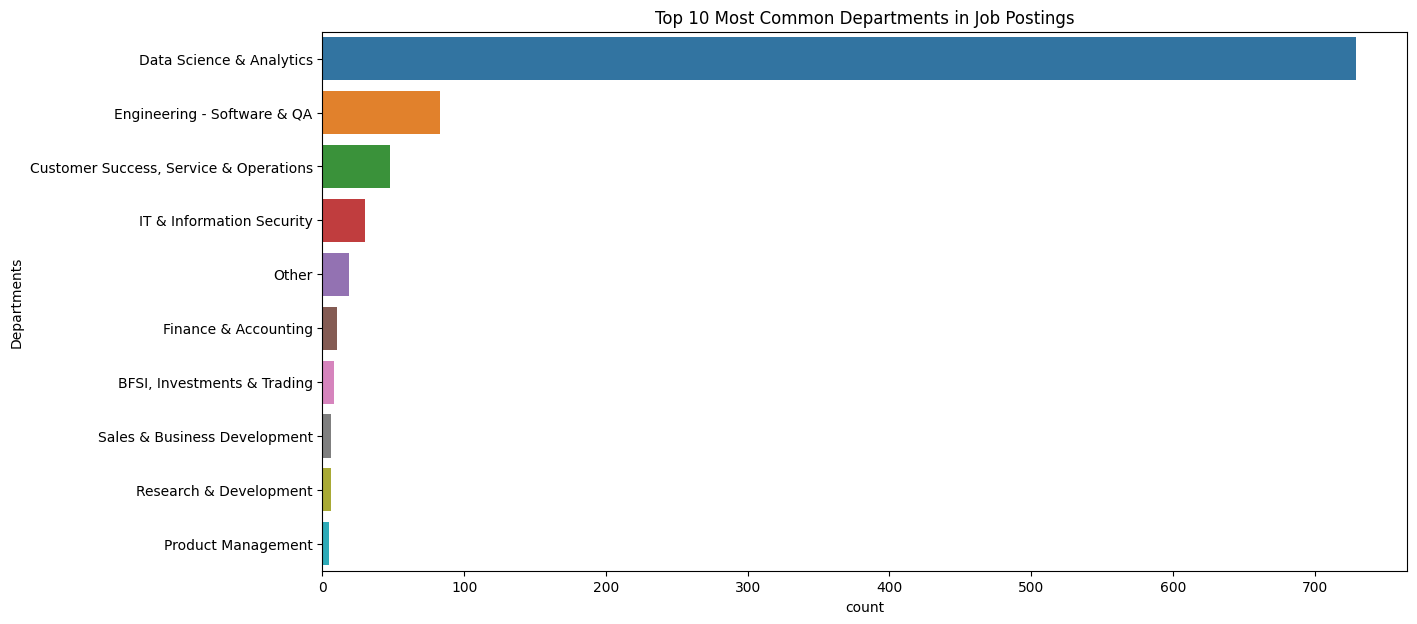

In [19]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, y='department', order=df['department'].value_counts().head(10).index, orient='h')
plt.title("Top 10 Most Common Departments in Job Postings")
plt.ylabel('Departments');

# Top 10 Most Common Role Category in Job Postings

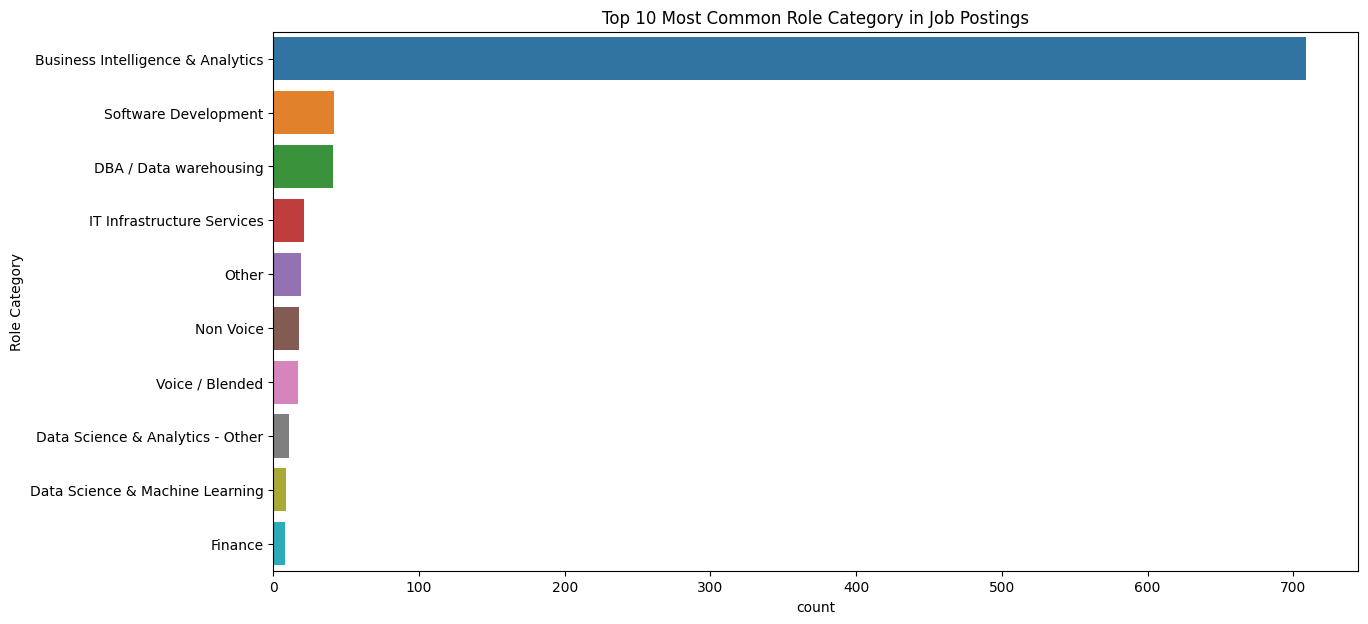

In [20]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, y='role_category', order=df['role_category'].value_counts().head(10).index, orient='h')
plt.title("Top 10 Most Common Role Category in Job Postings")
plt.ylabel('Role Category');

# Top 10 Education Qualification in Job Postings

In [21]:
education = df['education'].str.split(',')
education = [item.strip() for sublist in education for item in sublist]
most_common_education = Counter(education).most_common()

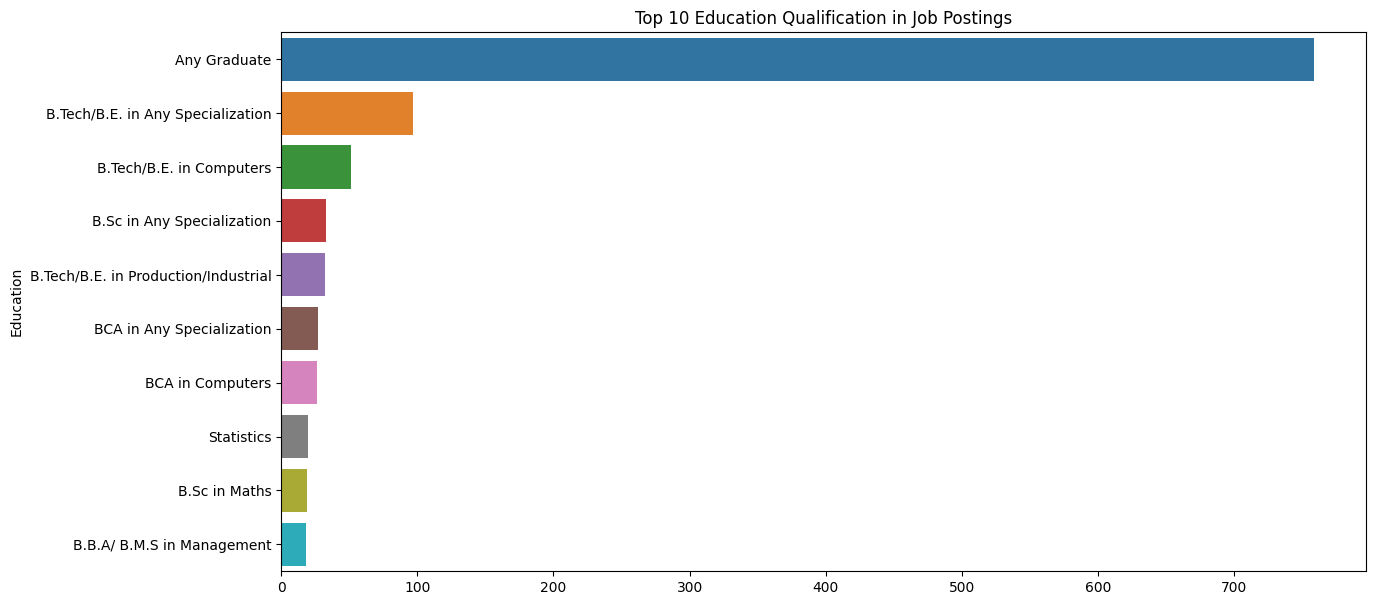

In [22]:
education_name = [elements[0] for elements in most_common_education][:10]
education_count = [elements[1] for elements in most_common_education][:10]
plt.figure(figsize=(14, 7))
ax = sns.barplot(y=education_name, x=education_count, orient='h')
plt.title("Top 10 Education Qualification in Job Postings")
plt.ylabel('Education');

# Others

In [23]:
# average number of openings 
# as you can see it does not make sense to have fractions in discrete data. Better option is to use median
df['num_openings'].mean()

1.5482954545454546

In [24]:
# median number of openings
df['num_openings'].median()

1.0

In [25]:
# company with highest number of opening
df.iloc[df['num_openings'].idxmax()]

job_title          EDP officer / Data Analyst | Jhunjhunun | Raja...
company_name                                      RMW India Services
experience                                               0 - 4 years
salary                                    ₹ 3,00,000 - 5,00,000 P.A.
location                                                  Chandrapur
job_description    - Process various forms for admission, test re...
role                                                    Data Analyst
industry_type                                    E-Learning / EdTech
department                                  Data Science & Analytics
employment_type                                 Full Time, Permanent
role_category                      Business Intelligence & Analytics
education                                               Any Graduate
key_skills         ['Advanced Excel', 'Report Preparation', 'Data...
date_posted                                              18 days ago
num_openings                      

In [26]:
# average number of applicants 
# as you can see it does not make sense to have fractions in discrete data. Better option is to use median and also 
# higher values skews the data, so mean is not the ideal choice here
df['num_applicants'].mean()

838.6670113753878

In [27]:
# median number of applicants
df['num_applicants'].median()

263.0

In [28]:
# company with highest number of applicants
df.iloc[df['num_applicants'].idxmax()]

job_title                                               Data Analyst
company_name                                     Quickxpert Infotech
experience                                               0 - 5 years
salary                                                 Not Disclosed
location                                                     Kolkata
job_description    We have immediate openings for Data Analyst Tr...
role                                                    Data Analyst
industry_type                             Analytics / KPO / Research
department                                  Data Science & Analytics
employment_type                                 Full Time, Permanent
role_category                      Business Intelligence & Analytics
education                                               Any Graduate
key_skills         ['SQL', 'python', 'C++', 'C', 'it', 'trainee',...
date_posted                                              12 days ago
num_openings                      

In [29]:
# FUTURE
# do somethings with job_description data, it contains many information which will give useful insights
# scrape other job portals and compare/aggreate results from them.